In [46]:
#기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 차트 한글, 유니코드 마이너스 설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False})
# ,style='darkgrid'
#머신러닝 패키지 추가
import statsmodels.api as sm    #안쓸걸
import sklearn as sk

#훈련 및 테스트세트 분리 패키지
from sklearn.model_selection import train_test_split

# 딥러닝 관련 패키지
from tensorflow import keras

#### 합성곱 신경망 이미지 분류

In [31]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [32]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled.shape

(60000, 28, 28, 1)

In [33]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state= 42)

In [34]:
print(train_scaled.shape)
print(train_target.shape)
print(val_scaled.shape)
print(val_target.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


#### 합성곱 신경망생성

In [35]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2)) # 14*14 특성맵 = 32개

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 7*7 특성맵 = 64개

In [38]:
model.add(keras.layers.Flatten())       #7*7*64 + 64
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))        # 60개 노드만 통과
model.add(keras.layers.Dense(10, activation='softmax'))


In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [40]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


####  모델 컴파일 훈련

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 베스트 모델을 저장할 콜백
# save_best_only=True 파라미터가 있어야 가장 좋은 모델 저장됨
#체크포인트로 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_cnn_model2.h5',
                                                save_best_only=True, verbose=1)

# 베스트 weights를 저장할 조기종료 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, 
                                                  restore_best_weights=True, verbose=1)

history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - ETA: 0s - loss: 0.5228 - accuracy: 0.8140
Epoch 1: val_loss improved from inf to 0.33825, saving model to ./data\best_cnn_model2.h5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.5228 - accuracy: 0.8140 - val_loss: 0.3382 - val_accuracy: 0.8733
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3407 - accuracy: 0.8774
Epoch 2: val_loss improved from 0.33825 to 0.28028, saving model to ./data\best_cnn_model2.h5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3406 - accuracy: 0.8774 - val_loss: 0.2803 - val_accuracy: 0.8936
Epoch 3/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.2901 - accuracy: 0.8954
Epoch 3: val_loss improved from 0.28028 to 0.24861, saving model to ./data\best_cnn_model2.h5
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2900 - accuracy: 0.8954 - val_loss: 0.2486 - val_accuracy: 0.9062
Epoch 4/20
1500/1500 [=

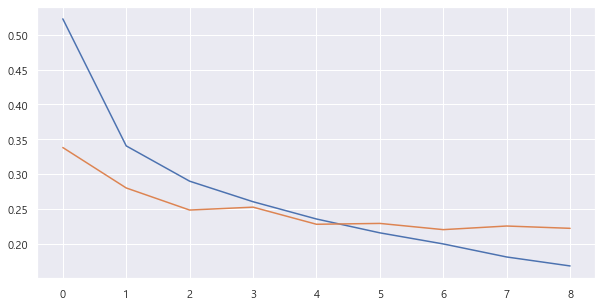

In [49]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [44]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 14ms/step - loss: 0.2205 - accuracy: 0.9204


[0.22052894532680511, 0.9204166531562805]

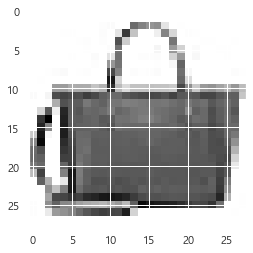

In [48]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [50]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 215ms/step
[[1.5433959e-18 3.2048986e-30 4.8614176e-21 2.0551919e-19 1.5392374e-20
  3.0029551e-17 1.1623352e-18 1.6535203e-23 1.0000000e+00 4.5046257e-21]]


In [51]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels

1/1 [==============================] - 0s 39ms/step


array([8], dtype=int64)

In [52]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [53]:
print(classes[np.argmax(preds)])

가방


In [54]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 8ms/step - loss: 0.2378 - accuracy: 0.9156


[0.23775270581245422, 0.9156000018119812]